In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
data=pd.read_csv('50_Startups.csv')

In [71]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [91]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['State']=le.fit_transform(data['State'])

In [92]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [33]:
data.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [34]:
data.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


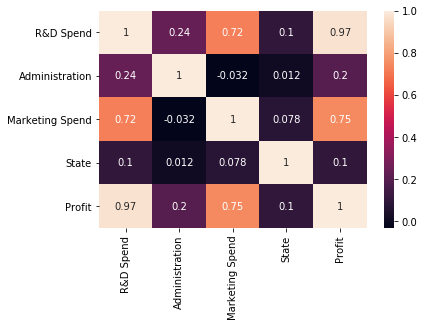

In [35]:
sns.heatmap(data.corr(),annot=True)

In [36]:
df=data.copy()

In [54]:
X=df.iloc[:,:1].values
y=df.iloc[:,-1].values

In [56]:
X

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34],
       [131876.9 ],
       [134615.46],
       [130298.13],
       [120542.52],
       [123334.88],
       [101913.08],
       [100671.96],
       [ 93863.75],
       [ 91992.39],
       [119943.24],
       [114523.61],
       [ 78013.11],
       [ 94657.16],
       [ 91749.16],
       [ 86419.7 ],
       [ 76253.86],
       [ 78389.47],
       [ 73994.56],
       [ 67532.53],
       [ 77044.01],
       [ 64664.71],
       [ 75328.87],
       [ 72107.6 ],
       [ 66051.52],
       [ 65605.48],
       [ 61994.48],
       [ 61136.38],
       [ 63408.86],
       [ 55493.95],
       [ 46426.07],
       [ 46014.02],
       [ 28663.76],
       [ 44069.95],
       [ 20229.59],
       [ 38558.51],
       [ 28754.33],
       [ 27892.92],
       [ 23640.93],
       [ 15505.73],
       [ 22177.74],
       [  1000.23],
       [  1315.46],
       [     0.  ],
       [   542.05],
       [     0.  ]])

In [57]:
#Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)

In [58]:
#model
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
predict=le.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((predict.reshape(len(predict),1), y_test.reshape(len(y_test),1)),1))

[[ 52162.56  14681.4 ]
 [115578.82 126992.93]
 [ 74836.5   77798.83]
 [ 89567.    96479.51]
 [ 70190.68  65200.33]
 [150150.65 152211.77]
 [101859.85  97483.56]
 [128463.68 141585.52]
 [113396.82 105733.54]
 [176893.98 191050.39]]


In [60]:
predict

array([ 52162.5624958 , 115578.81706558,  74836.50172748,  89567.00395569,
        70190.67604777, 150150.64597052, 101859.85359924, 128463.67989612,
       113396.81910182, 176893.98083986])

In [65]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, predict)

0.9059779724580681

In [66]:
#model 2 for MLR

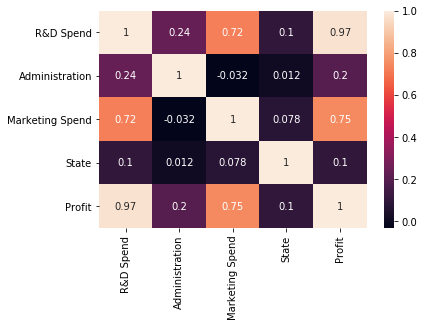

In [67]:
sns.heatmap(data.corr(),annot=True)

In [75]:
df2=data.copy()
df2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [76]:
columns=['Administration','State']
df2.drop(columns,inplace=True,axis=1)

In [77]:
df2.head()

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


In [78]:
X=df.iloc[:,:2].values
y=df.iloc[:,-1].values

In [79]:
#Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)

In [80]:
#model
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
predict=le.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((predict.reshape(len(predict),1), y_test.reshape(len(y_test),1)),1))

[[ 52013.68  14681.4 ]
 [115573.26 126992.93]
 [ 75275.15  77798.83]
 [ 90050.56  96479.51]
 [ 69505.34  65200.33]
 [149834.23 152211.77]
 [101315.79  97483.56]
 [128411.6  141585.52]
 [113027.52 105733.54]
 [177420.86 191050.39]]


In [82]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, predict)

0.9081611623100261

In [83]:
#accuracy increased after taking two features

In [93]:
df2=data.copy()
df2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [94]:
x=df2.iloc[:,:-1].values
y=df2.iloc[:,-1].values

In [95]:
x

array([[1.65e+05, 1.37e+05, 4.72e+05, 2.00e+00],
       [1.63e+05, 1.51e+05, 4.44e+05, 0.00e+00],
       [1.53e+05, 1.01e+05, 4.08e+05, 1.00e+00],
       [1.44e+05, 1.19e+05, 3.83e+05, 2.00e+00],
       [1.42e+05, 9.14e+04, 3.66e+05, 1.00e+00],
       [1.32e+05, 9.98e+04, 3.63e+05, 2.00e+00],
       [1.35e+05, 1.47e+05, 1.28e+05, 0.00e+00],
       [1.30e+05, 1.46e+05, 3.24e+05, 1.00e+00],
       [1.21e+05, 1.49e+05, 3.12e+05, 2.00e+00],
       [1.23e+05, 1.09e+05, 3.05e+05, 0.00e+00],
       [1.02e+05, 1.11e+05, 2.29e+05, 1.00e+00],
       [1.01e+05, 9.18e+04, 2.50e+05, 0.00e+00],
       [9.39e+04, 1.27e+05, 2.50e+05, 1.00e+00],
       [9.20e+04, 1.35e+05, 2.53e+05, 0.00e+00],
       [1.20e+05, 1.57e+05, 2.57e+05, 1.00e+00],
       [1.15e+05, 1.23e+05, 2.62e+05, 2.00e+00],
       [7.80e+04, 1.22e+05, 2.64e+05, 0.00e+00],
       [9.47e+04, 1.45e+05, 2.83e+05, 2.00e+00],
       [9.17e+04, 1.14e+05, 2.95e+05, 1.00e+00],
       [8.64e+04, 1.54e+05, 0.00e+00, 2.00e+00],
       [7.63e+04, 1.

In [96]:
#Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)

In [97]:
#model
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
predict=le.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((predict.reshape(len(predict),1), y_test.reshape(len(y_test),1)),1))

[[ 52013.68  14681.4 ]
 [115573.26 126992.93]
 [ 75275.15  77798.83]
 [ 90050.56  96479.51]
 [ 69505.34  65200.33]
 [149834.23 152211.77]
 [101315.79  97483.56]
 [128411.6  141585.52]
 [113027.52 105733.54]
 [177420.86 191050.39]]


In [99]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, predict)

0.9081611623100261